<a href="https://colab.research.google.com/github/invegat/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_143_Introduction_to_Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 143

## Introduction to Bayesian Inference

!['Detector! What would the Bayesian statistician say if I asked him whether the--' [roll] 'I AM A NEUTRINO DETECTOR, NOT A LABYRINTH GUARD. SERIOUSLY, DID YOUR BRAIN FALL OUT?' [roll] '... yes.'](https://imgs.xkcd.com/comics/frequentists_vs_bayesians_2x.png)

*[XKCD 1132](https://www.xkcd.com/1132/)*


## Prepare - Bayes' Theorem and the Bayesian mindset

Bayes' theorem possesses a near-mythical quality - a bit of math that somehow magically evaluates a situation. But this mythicalness has more to do with its reputation and advanced applications than the actual core of it - deriving it is actually remarkably straightforward.

### The Law of Total Probability

By definition, the total probability of all outcomes (events) if some variable (event space) $A$ is 1. That is:

$$P(A) = \sum_n P(A_n) = 1$$

The law of total probability takes this further, considering two variables ($A$ and $B$) and relating their marginal probabilities (their likelihoods considered independently, without reference to one another) and their conditional probabilities (their likelihoods considered jointly). A marginal probability is simply notated as e.g. $P(A)$, while a conditional probability is notated $P(A|B)$, which reads "probability of $A$ *given* $B$".

The law of total probability states:

$$P(A) = \sum_n P(A | B_n) P(B_n)$$

In words - the total probability of $A$ is equal to the sum of the conditional probability of $A$ on any given event $B_n$ times the probability of that event $B_n$, and summed over all possible events in $B$.

### The Law of Conditional Probability

What's the probability of something conditioned on something else? To determine this we have to go back to set theory and think about the intersection of sets:

The formula for actual calculation:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

We can see how this relates back to the law of total probability - multiply both sides by $P(B)$ and you get $P(A|B)P(B) = P(A \cap B)$ - replaced back into the law of total probability we get $P(A) = \sum_n P(A \cap B_n)$.

This may not seem like an improvement at first, but try to relate it back to the above picture - if you think of sets as physical objects, we're saying that the total probability of $A$ given $B$ is all the little pieces of it intersected with $B$, added together. The conditional probability is then just that again, but divided by the probability of $B$ itself happening in the first place.

### Bayes Theorem

Here is is, the seemingly magic tool:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In words - the probability of $A$ conditioned on $B$ is the probability of $B$ conditioned on $A$, times the probability of $A$ and divided by the probability of $B$. These unconditioned probabilities are referred to as "prior beliefs", and the conditioned probabilities as "updated."

Why is this important? Scroll back up to the XKCD example - the Bayesian statistician draws a less absurd conclusion because their prior belief in the likelihood that the sun will go nova is extremely low. So, even when updated based on evidence from a detector that is $35/36 = 0.972$ accurate, the prior belief doesn't shift enough to change their overall opinion.

There's many examples of Bayes' theorem - one less absurd example is to apply to [breathalyzer tests](https://www.bayestheorem.net/breathalyzer-example/). You may think that a breathalyzer test that is 100% accurate for true positives (detecting somebody who is drunk) is pretty good, but what if it also has 8% false positives (indicating somebody is drunk when they're not)? And furthermore, the rate of drunk driving (and thus our prior belief)  is 1/1000.

What is the likelihood somebody really is drunk if they test positive? Some may guess it's 92% - the difference between the true positives and the false positives. But we have a prior belief of the background/true rate of drunk driving. Sounds like a job for Bayes' theorem!

$$
\begin{aligned}
P(Drunk | Positive) &= \frac{P(Positive | Drunk)P(Drunk)}{P(Positive)} \\
&= \frac{1 \times 0.001}{0.08} \\
&= 0.0125
\end{aligned}
$$

In other words, the likelihood that somebody is drunk given they tested positive with a breathalyzer in this situation is only 1.25% - probably much lower than you'd guess. This is why, in practice, it's important to have a repeated test to confirm (the probability of two false positives in a row is $0.08 * 0.08 = 0.0064$, much lower), and Bayes' theorem has been relevant in court cases where proper consideration of evidence was important.

## Live Lecture - Deriving Bayes' Theorem, Calculating Bayesian Confidence

Notice that $P(A|B)$ appears in the above laws - in Bayesian terms, this is the belief in $A$ updated for the evidence $B$. So all we need to do is solve for this term to derive Bayes' theorem. Let's do it together!

Notice that  P(A|B)  appears in the above laws - in Bayesian terms, this is the belief in  A  updated for the evidence  B . So all we need to do is solve for this term to derive Bayes' theorem. Let's do it together!

x=2  is an inline equation.

x=2 
is a block equation.

x=2=1+1 
Now let's derive Bayes!

$$\Huge{P(A∩B)P(A|B)⇒P(A|B)P(B)P(B|A)⇒P(B|A)P(A)⇒P(A|B)P(B)⇒P(A|B)=P(B∩A)=P(A∩B)P(B)=P(A∩B)=P(B∩A)P(A)=P(B∩A)=P(A∩B)=P(B|A)P(A)=P(B|A)P(A)P(B)}
$$

In [6]:
# Activity 2 - Use SciPy to calculate Bayesian confidence intervals
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.htm
#scipy.stats.bayes_mvs

from scipy import stats
import numpy as np

coinflips = np.random.binomial(n=1, p=0.5, size=100)
print(coinflips)

[1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1
 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1
 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1]


In [3]:
# Frequentist approach (from yesterday)
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
  return (mean, mean - interval, mean + interval)

confidence_interval(coinflips)

(0.56, 0.46100986648567294, 0.6589901335143271)

In [4]:
stats.bayes_mvs(coinflips)

(Mean(statistic=0.56, minmax=(0.4771651355497598, 0.6428348644502402)),
 Variance(statistic=0.25402061855670105, minmax=(0.19995906446251127, 0.31980756778363556)),
 Std_dev(statistic=0.5027072964541676, minmax=(0.4471678258355707, 0.5655153117145773)))

## Assignment - Code it up!

Most of the above was pure math - write Python code to reproduce the results. This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goal - apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective.

In [0]:
stats.bayes_mvs(coinflips)

(Mean(statistic=0.5, minmax=(0.4165622050050835, 0.5834377949949164)),
 Variance(statistic=0.25773195876288657, minmax=(0.20288054430043756, 0.3244800809493055)),
 Std_dev(statistic=0.5063663545823536, minmax=(0.45042262853950576, 0.5696315308594719)))

In [18]:
stats.bayes_mvs(coinflips,0.5)[0].statistic

0.56

In [0]:
# stats.bayes_mvs??
mdist, vdist, sdist = stats.mvsdist(coinflips)
for dist in [mdist,vdist,sdist]:
  print(dist.mean(),dist.interval(0.90))

0.5 (0.4165622050050835, 0.5834377949949164)
0.25773195876288657 (0.20288054430043756, 0.3244800809493055)
0.5063663545823536 (0.45042262853950576, 0.5696315308594719)


In [0]:
stats.mvsdist??

In [0]:
def bayes_mvs_t(data, alpha=0.90):
    m, v, s = stats.mvsdist(data)
    if alpha >= 1 or alpha <= 0:
        raise ValueError("0 < alpha < 1 is required, but alpha=%s was given."
                         % alpha)

    m_res = Mean(m.mean(), m.interval(alpha))
    v_res = Variance(v.mean(), v.interval(alpha))
    s_res = Std_dev(s.mean(), s.interval(alpha))

    return m_res, v_res, s_res
  
mean, var, std = bayes_mvs_t(coinflips) 

In [11]:
from scipy.stats import bernoulli
from matplotlib import pyplot as plt
bernoulli.pmf([.5,.5],[10,7])

array([nan, nan])

p01: 0.0
p99: 1.0
x: [0.]


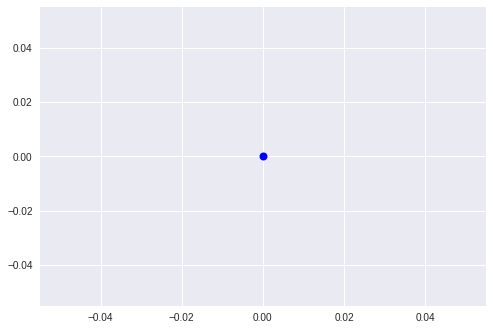

In [13]:
p = 0.3
p01 = bernoulli.ppf(0.01, p)
print(f"p01: {p01}")
p99 = bernoulli.ppf(0.99, p)
print(f"p99: {p99}")
x = np.arange(bernoulli.ppf(0.01, p),
              bernoulli.ppf(0.99, p))
print(f"x: {x}")
fig, ax = plt.subplots(1, 1)
ax.plot(x, 'bo', ms=8, label='bernoulli pmf')
# ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)
plt.show()

In [0]:
from functools import reduce
def p(M,n,N,x): # calculate  theta for all M - N are not dogs
  theta = n / (M - x + 1) 
  return theta
def p_are(M,n,N,x): # calculate  theta for all N are not dogs
  theta = n / (M - x + 1) 
  return theta
  


    Suppose we have a collection of 20 animals, of which 7 are dogs.  Then if
    we want to know the probability of finding a given number of dogs if we
    choose at random 12 of the 20 animals, we can initialize a frozen
    distribution and plot the probability mass function:

0.01444788441692464
0.06871947673599997


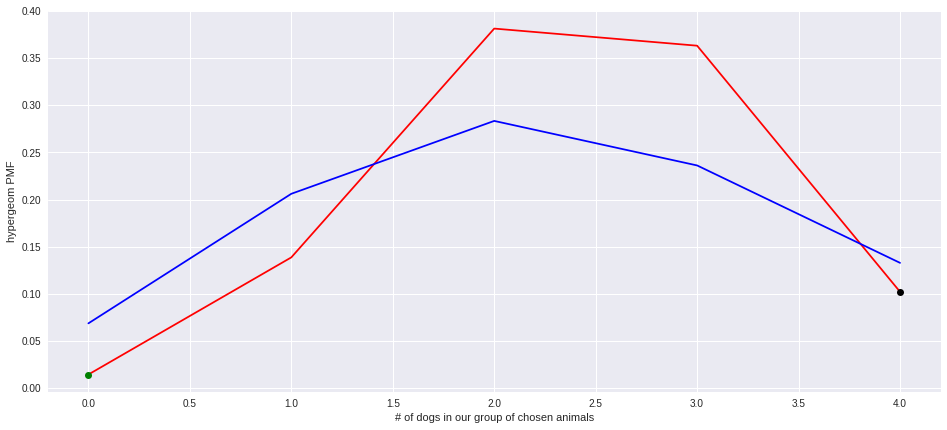

In [28]:
from scipy.stats import hypergeom, binom
[M, n, N] = [20, 4, 12]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_dogs = rv.pmf(x)
print(pmf_dogs[0])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_dogs,c = 'r')
#ax.vlines(x, 0, pmf_dogs, lw=2)
ax.set_xlabel('# of dogs in our group of chosen animals')
ax.set_ylabel('hypergeom PMF')

theta = n / M
no_dogs_in_unused = reduce((lambda t,x: t * (1 - p(M, n, N, x))), range(1,M-N+1), 1)
all_dogs_in_unused = reduce((lambda t,x: t * (1 - p(M, n, N, x))), range(1,N+1), 1)
#tpmf_dogs = [likelihood(theta, N, x_) for x_ in  x]
tpmf_dogs = binom.pmf(x,N,theta)
print(tpmf_dogs[0])
ax.plot(x, tpmf_dogs, c = 'b')
ax.plot([0], [all_dogs_in_unused], 'o', c='green')
ax.plot([n], [no_dogs_in_unused], 'o', c='black')
plt.show()

# returns probablity that n coin flips will have exactly x heads for probability of heads theta 

In [0]:
def posterior(n, h, q):
    return (n + 1) * stats.binom(n, q).pmf(h)

[]

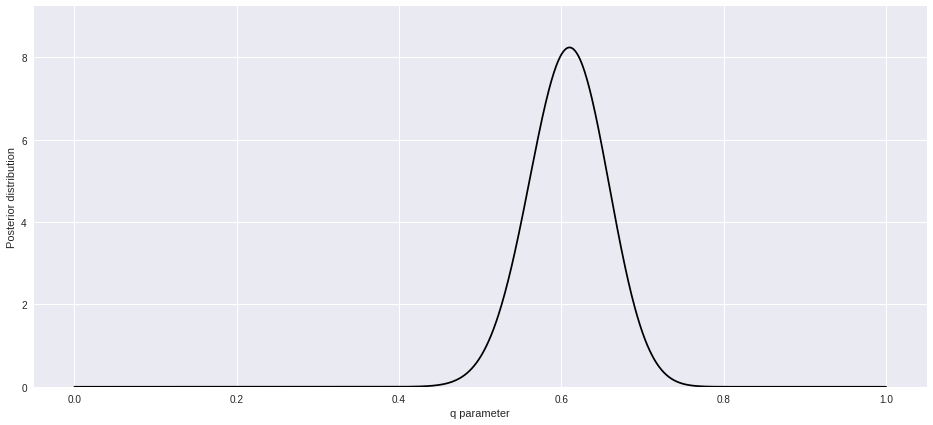

In [74]:
n = 100
h = 61
q = np.linspace(0., 1., 1000)
d = posterior(n, h, q)
fig, ax = plt.subplots(1, 1)
ax.plot(q, d, '-k')
ax.set_xlabel('q parameter')
ax.set_ylabel('Posterior distribution')
ax.set_ylim(0, d.max() + 1)
plt.plot()

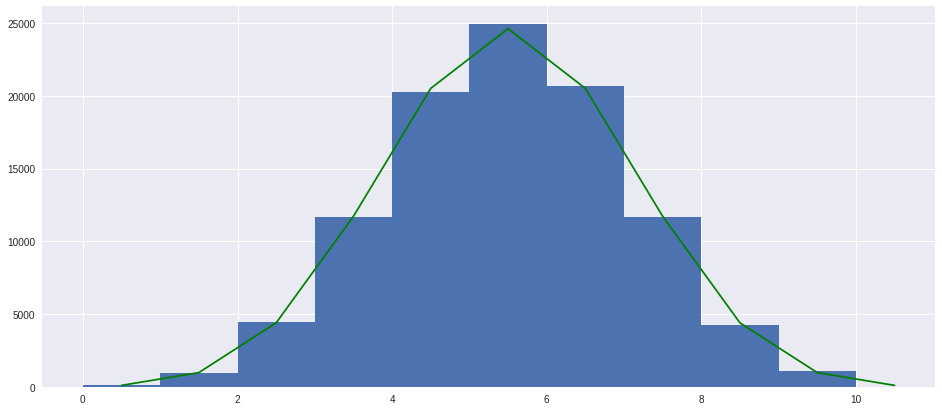

In [29]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import bernoulli, binom

r = 100000
theta = 0.5
bins = 10
plt.rcParams['figure.figsize'] = (16,7)


# def likelihood(theta, n, x):
#     return (factorial(n) / (factorial(x) * factorial(n - x))) * (theta ** x) * ((1 - theta) ** (n - x))
  
nlx = binom.pmf(range(0,11),10,theta) * r   
plt.plot([x + 5/bins for x in range(11)],  nlx,c='g')  
# returns probablity that n coin flips will have exactly x heads for probability of heads theta 

nz =  [np.count_nonzero(np.random.binomial(n=1, p=theta, size=10)) for _ in range(r)]

# baynes = stats.bayes_mvs(coinflips,theta)[0].statistic
#bern = scipy.stats.bernoulli(p, moments='m')

#nl = [likelihood(theta,10,x) * r for x in range(0,11)]

#plt.plot([x + 5/bins for x in range(11)],  nl,c='r')
plt.hist(nz,bins=bins)
plt.show()



In [0]:
 binom.pmf?

try to get https://www.datascience.com/blog/introduction-to-bayesian-inference-learn-data-science-tutorials to work

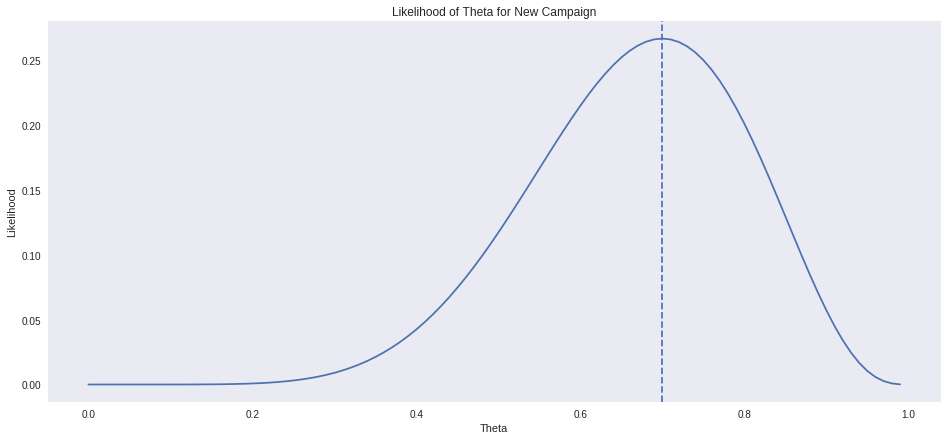

In [30]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,7)


# def likelihood(theta, n, x):
#     """
#     likelihood function for a binomial distribution

#     n: [int] the number of experiments
#     x: [int] the number of successes
#     theta: [float] the proposed probability of success
#     """
#     return (factorial(n) / (factorial(x) * factorial(n - x))) * (theta ** x) * ((1 - theta) ** (n - x))

# returns probablity that n coin flips will have exactly x heads for probability of heads theta 



#the number of impressions for our facebook-yellow-dress campaignn_impressions = 10.
n_impressions = 10
#the number of clicks for our facebook-yellow-dress campaign
n_clicks = 7.
#observed click through rate
ctr = n_clicks / n_impressions
#0 to 1, all possible click through rates
possible_theta_values = list(np.linspace(0,.99,100))

# #evaluate the likelihood function for possible click through rates

# likelihoods = [likelihood(theta, n_impressions, n_clicks) for theta in possible_theta_values] 
likelihoods = binom.pmf([n_clicks], n_impressions, possible_theta_values)
#pick the best theta
mle = possible_theta_values[np.argmax(likelihoods)]
#plot
f, ax = plt.subplots(1)
ax.plot(possible_theta_values, likelihoods)
ax.axvline(mle, linestyle = "--")
ax.set_xlabel("Theta")
ax.set_ylabel("Likelihood")
ax.grid()
ax.set_title("Likelihood of Theta for New Campaign")
plt.show()

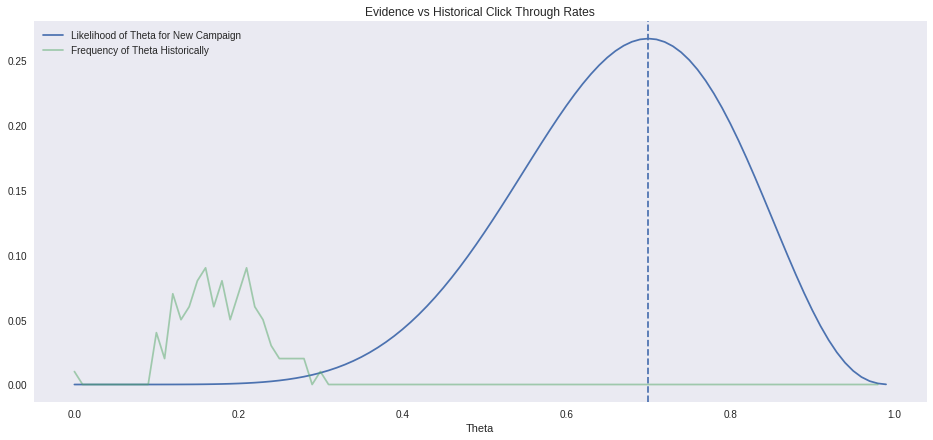

In [31]:
plt.rcParams['figure.figsize'] = (16, 7)
import numpy as np
import pandas as pd

true_a = 11.5
true_b = 48.5
#number of marketing campaigns
N = 100 #randomly generate "true" click through rate for each campaign
p = np.random.beta(true_a,true_b, size=N)
#randomly pick the number of impressions for each campaign
impressions = np.random.randint(1, 10000, size=N)
#sample number of clicks for each campaign
clicks = np.random.binomial(impressions, p).astype(float)
click_through_rates = clicks / impressions
#plot the histogram of previous click through rates with the evidence#of the new campaign
f, ax = plt.subplots(1)
ax.axvline(mle, linestyle = "--")
ax.plot(possible_theta_values, likelihoods)

zero_to_one = np.linspace(0,.99,100)
counts, bins = np.histogram(click_through_rates
                            , bins=zero_to_one)
counts = counts / 100.
ax.plot(bins[:-1],counts, alpha = .5)
line1, line2, line3 = ax.lines
ax.legend((line2, line3), ('Likelihood of Theta for New Campaign'
                           , 'Frequency of Theta Historically')
                          , loc = 'upper left')
ax.set_xlabel("Theta")
ax.grid()
ax.set_title("Evidence vs Historical Click Through Rates")
plt.show()

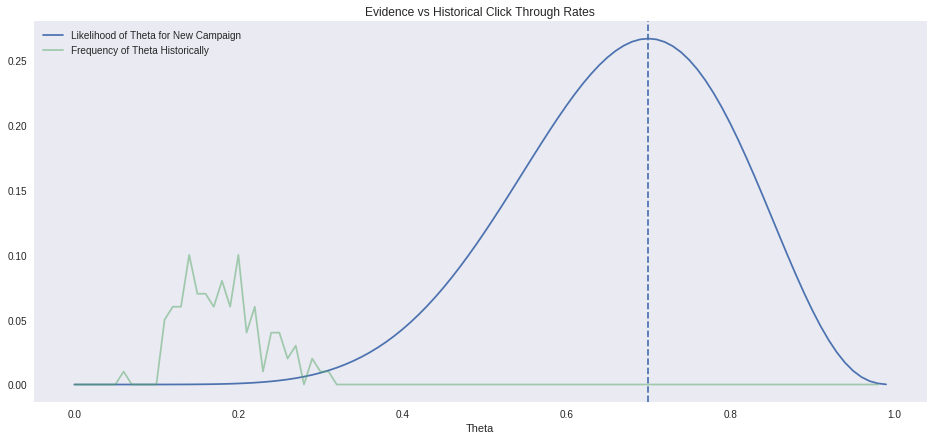

In [32]:
plt.rcParams['figure.figsize'] = (16, 7)
import numpy as np
import pandas as pd

true_a = 11.5
true_b = 48.5
#number of marketing campaigns
N = 100#randomly generate "true" click through rate for each campaign
p = np.random.beta(true_a,true_b, size=N)
#randomly pick the number of impressions for each campaign
impressions = np.random.randint(1, 10000, size=N)
#sample number of clicks for each campaign
clicks = np.random.binomial(impressions, p).astype(float)
click_through_rates = clicks / impressions
#plot the histogram of previous click through rates with the evidence#of the new campaign
f, ax = plt.subplots(1)
ax.axvline(mle, linestyle = "--")
ax.plot(possible_theta_values, likelihoods)

counts, bins = np.histogram(click_through_rates
                            , bins=zero_to_one)
counts = counts / 100.
ax.plot(bins[:-1],counts, alpha = .5)
line1, line2, line3 = ax.lines
ax.legend((line2, line3), ('Likelihood of Theta for New Campaign'
                           , 'Frequency of Theta Historically')
                          , loc = 'upper left')
ax.set_xlabel("Theta")
ax.grid()
ax.set_title("Evidence vs Historical Click Through Rates")
plt.show()

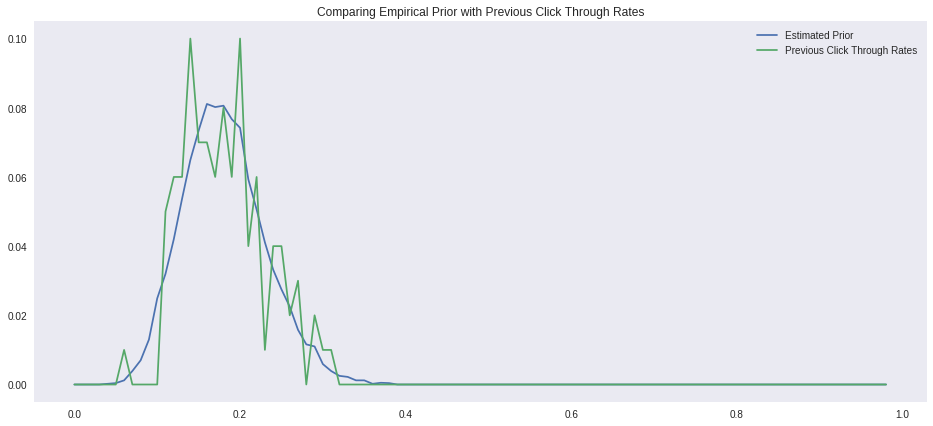

In [33]:
from scipy.stats import beta
#fit beta to previous CTRs
prior_parameters = beta.fit(click_through_rates
                            , floc = 0
                            , fscale = 1)#extract a,b from fit
prior_a, prior_b = prior_parameters[0:2]

#define prior distribution sample from prior
prior_distribution = beta(prior_a, prior_b)
#get histogram of samples
prior_samples = prior_distribution.rvs(10000)
#get histogram of samples
fit_counts, bins = np.histogram(prior_samples
                                , zero_to_one)#normalize histogram
# fit_counts = map(lambda x: float(x)/fit_counts.sum()
#                          , fit_counts)
fit_counts = [float(x)/fit_counts.sum() for x in fit_counts]
#plot
f, ax = plt.subplots(1)
ax.plot(bins[:-1], fit_counts)

hist_ctr, bins = np.histogram(click_through_rates
                              , zero_to_one)
# hist_ctr = map(lambda x: float(x)/hist_ctr.sum()
#                               , hist_ctr)
hist_ctr = [float(x)/hist_ctr.sum() for x in hist_ctr]
ax.plot(bins[:-1], hist_ctr)
estimated_prior, previous_click_through_rates = ax.lines
ax.legend((estimated_prior, previous_click_through_rates)
          ,('Estimated Prior'
            , 'Previous Click Through Rates'))
ax.grid()
ax.set_title("Comparing Empirical Prior with Previous Click Through Rates")
plt.show()

In [0]:
# !pip install pymc3

In [34]:
import pymc3 as pm
import numpy as np

#create our data:clicks = np.array([n_clicks])
#clicks represents our successes. We observed 7 clicks.impressions = np.array([n_impressions])
#this represents the number of trials. There were 10 impressions.
n = 10
clicks = np.array([ctr * n])    #re-estimate the posterior for
impressions = np.array([n])

with pm.Model() as model:
#sets a context; all code in block "belongs" to the model object

    theta_prior = pm.Beta('prior', alpha=11.5, beta=48.5)
    #our prior distribution, Beta (11.5, 48.5)
#     observations = pm.Binomial('obs',n = impressions
#                                , p = theta_prior
#                                , observed = clicks)     #Sampling distribition of outcomes in the dataset.
    # y = pm.Binomial('y', n=impressions, p=theta_prior, observed=clicks)

    y = pm.Binomial('y', n=impressions, p=theta_prior, observed=clicks)
    #our prior p_prior will be updated with data|


#     start = pm.find_MAP()    #find good starting values for the sampling algorithm
    # step = pm.Metropolis() # Have a choice of samplers
#     #Max Aposterior values, or values that are most likely
    
#     # print(dir(pm.NUTS))

#     step = pm.NUTS()     #Choose a particular MCMC algorithm     #we'll choose NUTS, the No U-Turn Sampler (Hamiltonian)

    trace = pm.sample(5000
#                       , step
#                       , start=start
                      , progressbar=True)               #obtain samples


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [prior]
100%|██████████| 5500/5500 [00:02<00:00, 2253.79it/s]


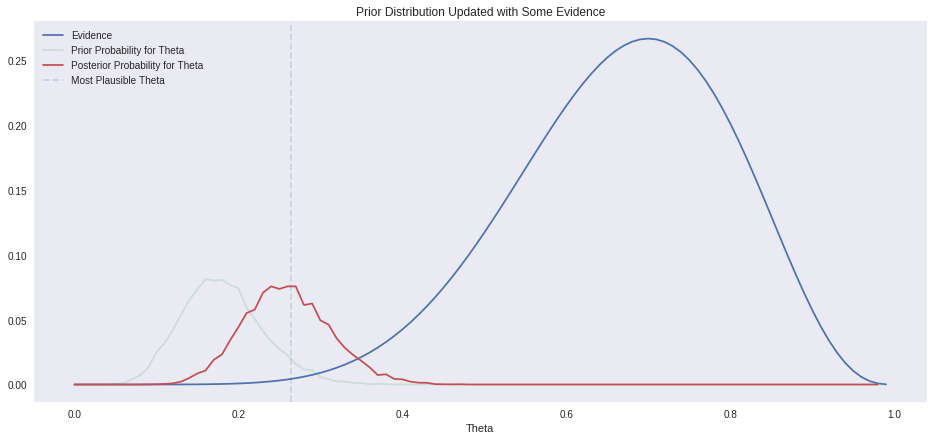

In [35]:
#plot the histogram of click through rates
plt.rcParams['figure.figsize'] = (16, 7)
#get histogram of samples from posterior distribution of CTRs
# print(f"max trace['prior']: {max(trace['prior'])}")
posterior_counts, posterior_bins = np.histogram(trace['prior']
                                                ,bins=zero_to_one)
posterior_counts = [float(x)/posterior_counts.sum() for x in posterior_counts]
#normalized histogramposterior_counts = posterior_counts / float(posterior_counts.sum())
#take the mean of the samples as most plausible value
most_plausible_theta = np.mean(trace['prior'])
#print(f"most_plausible_theta {most_plausible_theta}")
#histogram of samples from prior distribution
prior_counts, bins = np.histogram(prior_samples
                                  , zero_to_one)#normalize
# prior_counts = map(lambda x: float(x)/prior_counts.sum()
#                    , prior_counts)
prior_counts = [float(x)/prior_counts.sum() for x in prior_counts]
#plot
f, ax = plt.subplots(1)
ax.plot(possible_theta_values, likelihoods)
ax.plot(bins[:-1],prior_counts, alpha = .2)
ax.plot(bins[:-1],posterior_counts)
ax.axvline(most_plausible_theta, linestyle = "--", alpha = .2)
line1, line2, line3, line4 = ax.lines
# line1, line2, line3 = ax.lines
ax.legend((line1, line2, line3, line4), ('Evidence'
                                         , 'Prior Probability for Theta'
                                         , 'Posterior Probability for Theta'
                                         , 'Most Plausible Theta'
                                        ), loc = 'upper left')
# ax.legend((line1, line2, line3), ('Evidence'
#                                          , 'Prior Probability for Theta'
#                                          , 'Most Plausible Theta'
#                                         ), loc = 'upper left')
ax.set_xlabel("Theta")
ax.grid()
ax.set_title("Prior Distribution Updated with Some Evidence")
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [prior]
100%|██████████| 5500/5500 [00:02<00:00, 2173.23it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [prior]
100%|██████████| 5500/5500 [00:02<00:00, 2191.73it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [prior]
100%|██████████| 5500/5500 [00:02<00:00, 2206.91it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [prior]
100%|██████████| 5500/5500 [00:02<00:00, 2117.12it/s]
The acceptance probability does not match the target. It is 0.8892224248857692, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8946432195881556, but should be close to 0.8. Try 

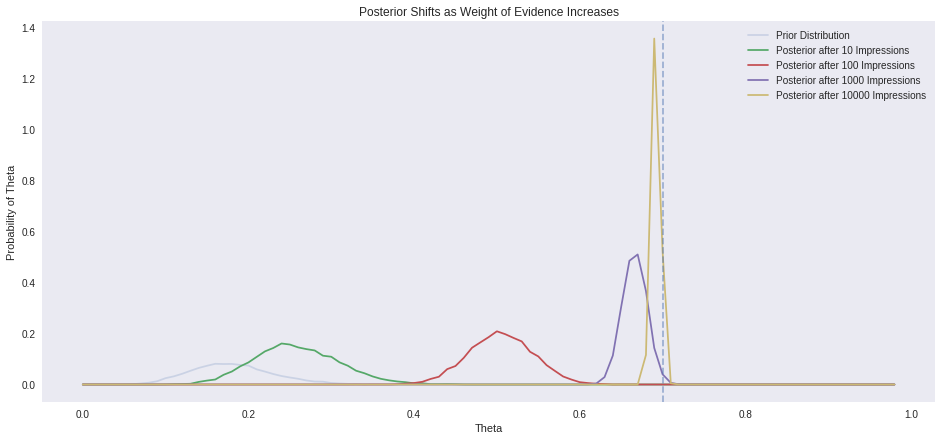

In [36]:
import pymc3 as pm
import numpy as np

#create our data:
traces = {}
for ad_impressions in [10, 100, 1000, 10000]: #maintaining observed CTR of 0.7
    clicks = np.array([ctr * ad_impressions])    #re-estimate the posterior for
    impressions = np.array([ad_impressions])    #increasing numbers of impressions
    with pm.Model() as model:
        theta_prior = pm.Beta('prior', 11.5, 48.5)
        observations = pm.Binomial('obs',n = impressions
                                   , p = theta_prior
                                   , observed = clicks)
#         start = pm.find_MAP()
#         step = pm.Metropolis()
        trace = pm.sample(5000
#                           , step
#                           , start=start
                          , progressbar=True)

        traces[ad_impressions] = trace


f, ax = plt.subplots(1)
ax.plot(bins[:-1],prior_counts, alpha = .2)

counts = {}
for ad_impressions in [10, 100, 1000, 10000]:
    trace = traces[ad_impressions]
    posterior_counts, posterior_bins = np.histogram(trace['prior'], bins=zero_to_one)
    posterior_counts = posterior_counts / float(len(trace))
    ax.plot(bins[:-1], posterior_counts)
line0, line1, line2, line3, line4 = ax.lines
ax.legend((line0, line1, line2, line3, line4), ('Prior Distribution'
                                                ,'Posterior after 10 Impressions'
                                                , 'Posterior after 100 Impressions'
                                                , 'Posterior after 1000 Impressions'
                                                ,'Posterior after 10000 Impressions'))
ax.set_xlabel("Theta")
ax.axvline(ctr, linestyle = "--", alpha = .5)
ax.grid()
ax.set_ylabel("Probability of Theta")
ax.set_title("Posterior Shifts as Weight of Evidence Increases")
plt.show()

In [0]:
# http://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29#
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip

--2018-12-19 17:44:13--  http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42989872 (41M) [application/zip]
Saving to: ‘drugsCom_raw.zip’

drugsCom_raw.zip    100%[===================>]  41.00M  11.2MB/s    in 4.4s    

2018-12-19 17:44:18 (9.27 MB/s) - ‘drugsCom_raw.zip’ saved [42989872/42989872]



In [0]:
!unzip drugsCom_raw.zip

Archive:  drugsCom_raw.zip
  inflating: drugsComTest_raw.tsv    
  inflating: drugsComTrain_raw.tsv   


In [0]:
import pandas as pd
sample_size = 10000
df = pd.read_csv('drugsComTrain_raw.tsv', sep='\t')
#df = df[df.drugName.notnull() and df.condition.notnull() and df.rating.notnull()]
df = df.dropna()
df = df[~df.condition.str.contains('<')]
# df.rating.apply(lambda rating: rating if rating < 10 else 10)
#df = df.sample(n=sample_size).drop(['Unnamed: 0','review','date','usefulCount'], axis=1).reindex(range(1,sample_size), axis=0)
# df = df.sample(n=sample_size).drop(['Unnamed: 0','review','date','usefulCount'], axis=1)
df = df.drop(['Unnamed: 0','review','date','usefulCount'], axis=1)
df.tail()

,drugName,condition,rating
161292,Campral,Alcohol Dependence,10.0
161293,Metoclopramide,Nausea/Vomiting,1.0
161294,Orencia,Rheumatoid Arthritis,2.0
161295,Thyroid desiccated,Underactive Thyroid,10.0
161296,Lubiprostone,"Constipation, Chronic",9.0


In [0]:
# Confidence intervals!
# Similar to hypothesis testing, but centered at sample mean
# Better than reporting the "point estimate" (sample mean)
# Why? Because point estimates aren't always perfect

import numpy as np
from scipy import stats

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence ifor nterval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  mean, variance, std  = stats.bayes_mvs(np.array(data), alpha=0.95)

  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
  return (mean, mean - interval, mean + interval)

def report_confidence_interval(confidence_interval):
  """
  Return a string with a pretty report of a confidence interval.
  
  Arguments:
    confidence_interval - tuple of (mean, lower bound, upper bound)
  
  Returns:
    None, but prints to screen the report
  """
  #print('Mean: {}'.format(confidence_interval[0]))
  #print('Lower bound: {}'.format(confidence_interval[1]))
  #print('Upper bound: {}'.format(confidence_interval[2]))
  s = "our mean lies in the interval ]{:.2}, {:.2}[".format(
      confidence_interval[1], confidence_interval[2])
  s = f"our mean {confidence_interval[0]:.2f} lies in the interval {confidence_interval[1]:.2f} - {confidence_interval[2]:.2f}"
  return s